In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
import math

In [2]:
data = pd.read_csv('E:\\vscode_workstation\\jupyter_program\\mining_videogams\\data\\vgsales.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
def hist(x, y, xl, yl):
    plt.figure(figsize=(16, 9))
    plt.bar(x, y)
    plt.xticks(rotation=90)
    plt.tick_params(labelsize=10)
    font = {'family':'Times New Roman', 'size':20}
    plt.xlabel(xl, font)
    plt.ylabel(yl, font)
    plt.title('summary', font)
    plt.show()

# 1.市场分析

## 1.1 受欢迎的游戏

### 根据销售量来看，全平台最受欢迎的游戏无疑是Wii Sports，分析一下各个平台单独的情况

- PS4平台

In [6]:
PS4 = data[data['Platform']=='PS4']

In [7]:
x = PS4['Name'][:20]
y = PS4['Global_Sales'][:20]

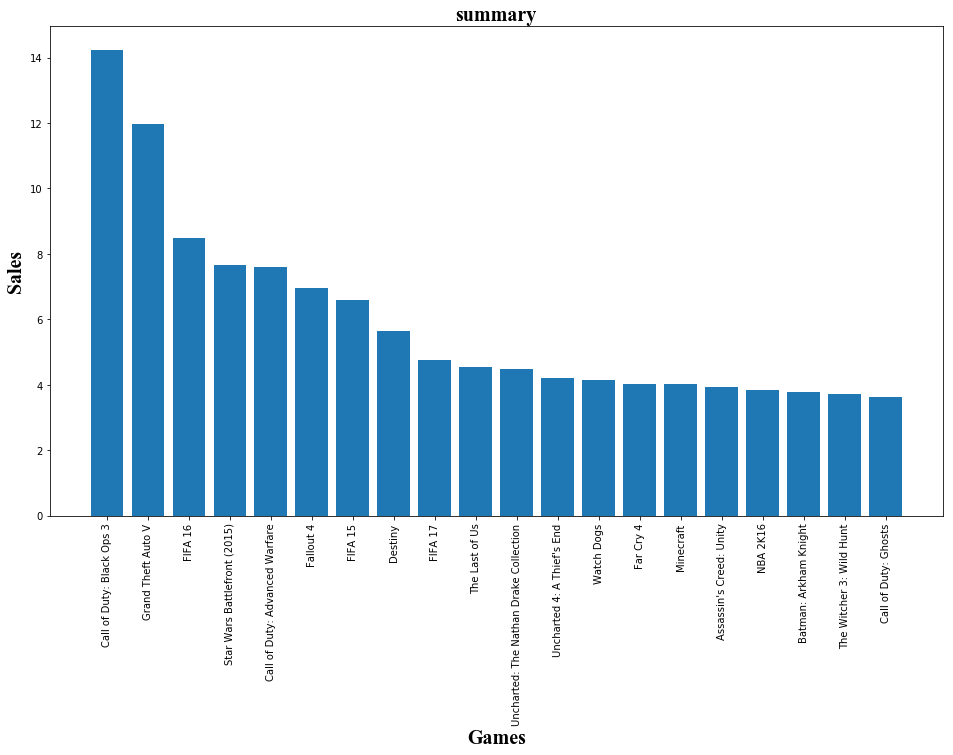

In [8]:
hist(x, y, 'Games', 'Sales')

### 可以看到，PS4平台上最受欢迎的是使命召唤：黑色行动3，其次是GTA5，FIFA16等

### 其他平台分析同理，不在此赘述

## 1.2 受欢迎的类型

In [9]:
cat_dict = {}
for i, cat in enumerate(data['Genre']):
    cat_dict[cat] = cat_dict.get(cat, 0) + data['Global_Sales'][i]
print(cat_dict)

{'Sports': 1330.929999999988, 'Platform': 831.3699999999974, 'Racing': 732.0399999999955, 'Role-Playing': 927.3699999999941, 'Puzzle': 244.9500000000005, 'Misc': 809.9599999999936, 'Shooter': 1037.3699999999901, 'Simulation': 392.19999999999783, 'Action': 1751.1799999999691, 'Fighting': 448.90999999999923, 'Adventure': 239.04000000000138, 'Strategy': 175.1200000000004}


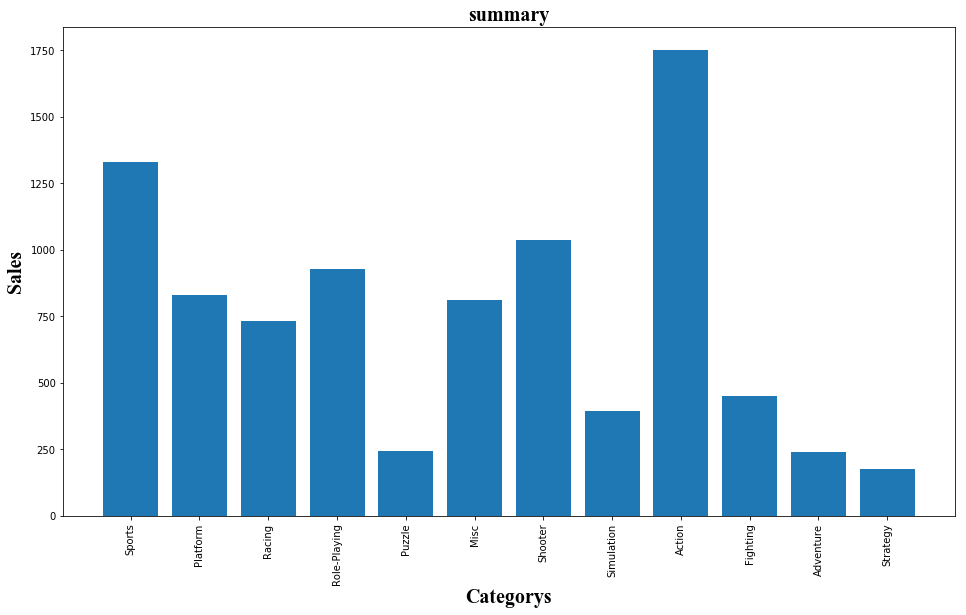

In [10]:
x = cat_dict.keys()
y = cat_dict.values()
hist(x, y, 'Categorys', 'Sales')

### 可以看到，最受欢迎的游戏类型分别是动作、体育、射击、角色扮演等

## 1.3 受欢迎的平台

In [11]:
pla_dict = {}
for i, item in enumerate(data['Platform']):
    pla_dict[item] = pla_dict.get(item, 0) + data['Global_Sales'][i]
print(pla_dict)

{'Wii': 926.7099999999971, 'NES': 251.06999999999988, 'GB': 255.44999999999987, 'DS': 822.4899999999874, 'X360': 979.9599999999996, 'PS3': 957.8399999999987, 'PS2': 1255.6399999999871, 'SNES': 200.05000000000024, 'GBA': 318.499999999998, '3DS': 247.4600000000001, 'PS4': 278.0999999999994, 'N64': 218.87999999999985, 'PS': 730.659999999997, 'XB': 258.25999999999834, 'PC': 258.81999999999846, '2600': 97.08000000000003, 'PSP': 296.2799999999948, 'XOne': 141.05999999999995, 'GC': 199.3600000000007, 'WiiU': 81.86000000000006, 'GEN': 28.360000000000003, 'DC': 15.969999999999997, 'PSV': 61.93000000000005, 'SAT': 33.59000000000002, 'SCD': 1.8700000000000003, 'WS': 1.42, 'NG': 1.4400000000000004, 'TG16': 0.16, '3DO': 0.1, 'GG': 0.04, 'PCFX': 0.03}


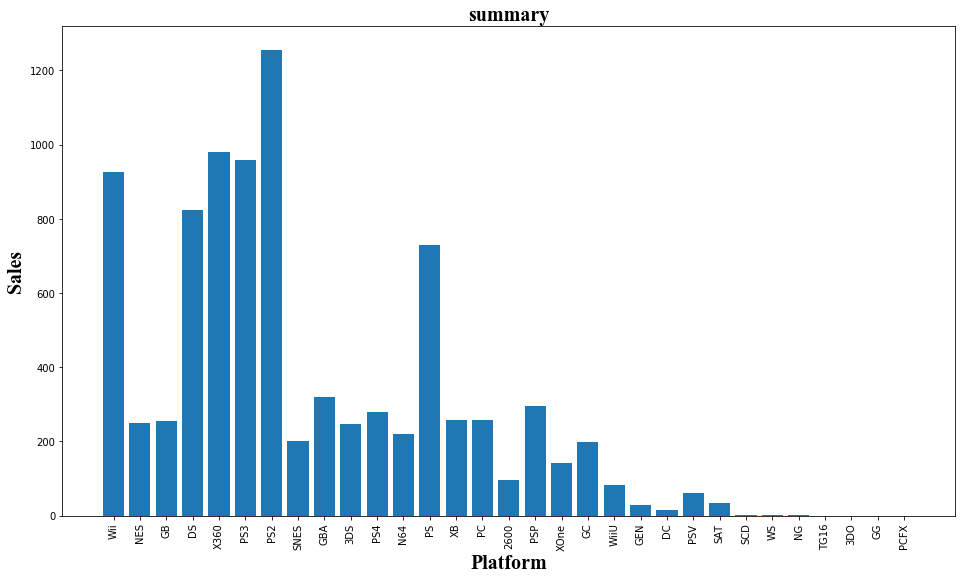

In [12]:
x = pla_dict.keys()
y = pla_dict.values()
hist(x, y, 'Platform', 'Sales')

### 可以看到，最受欢迎的游戏平台分别是PS2、X360、PS3等

## 1.4 受欢迎的发行商

In [13]:
pub_dict = {}
for i, item in enumerate(data['Publisher']):
    pub_dict[item] = pub_dict.get(item, 0) + data['Global_Sales'][i]

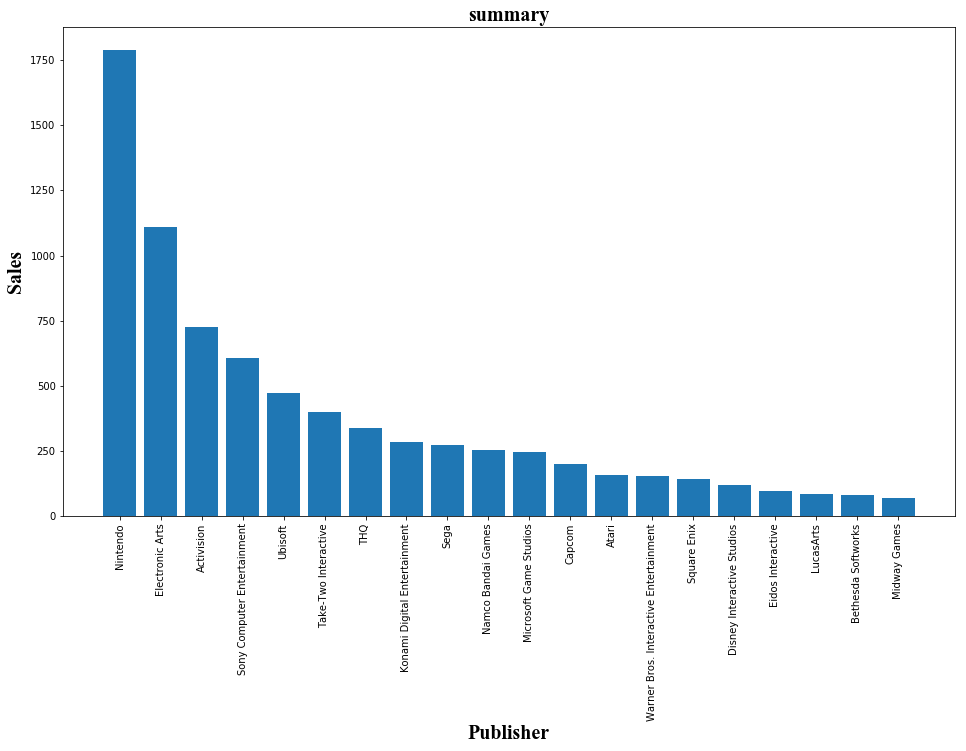

In [14]:
pub = sorted(pub_dict.items(), key=lambda x:x[1], reverse=True)
x, y = [], []
for i in range(20):
    x.append(pub[i][0])
    y.append(pub[i][1])
hist(x, y, 'Publisher', 'Sales')

### 可以看到最受欢迎的发行商分别是任天堂、艺电、动视等公司

# 2.预测每年电子游戏销售额

In [15]:
year_dict = {}
for i, item in enumerate(data['Year'].dropna()):
    year_dict[item] = year_dict.get(item, 0) + data['Global_Sales'][i]

In [16]:
year = sorted(year_dict.items(), key=lambda x:x[0])

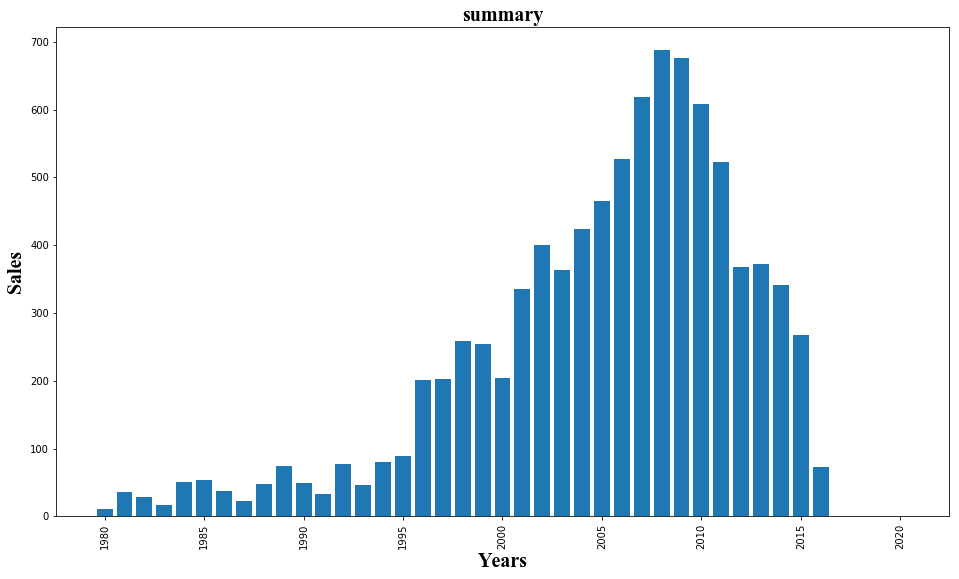

In [17]:
x, y = [], []
for i in range(len(year)):
    x.append(year[i][0])
    y.append(year[i][1])
hist(x, y, 'Years', 'Sales')

### 可以看到，每年电子游戏销售额近似服从正态分布，所有用正态分布进行拟合

In [18]:
x = np.array(x)
y = np.array(y)
s = np.sum(y)

### 由于该正态分布不完整，需要进行修正

In [19]:
x_cont = data.iloc[:,3]
x_modify = []
for i in range(21):
    nums = y[i]
    s += nums
    while nums > 0:
        x_modify.append(4017. - x[i])
        nums -= 1
x_modify = np.array(x_modify)
x_all = np.concatenate([x_cont, x_modify])
mu = np.nanmean(x_all)
sigma = np.nanstd(x_all)

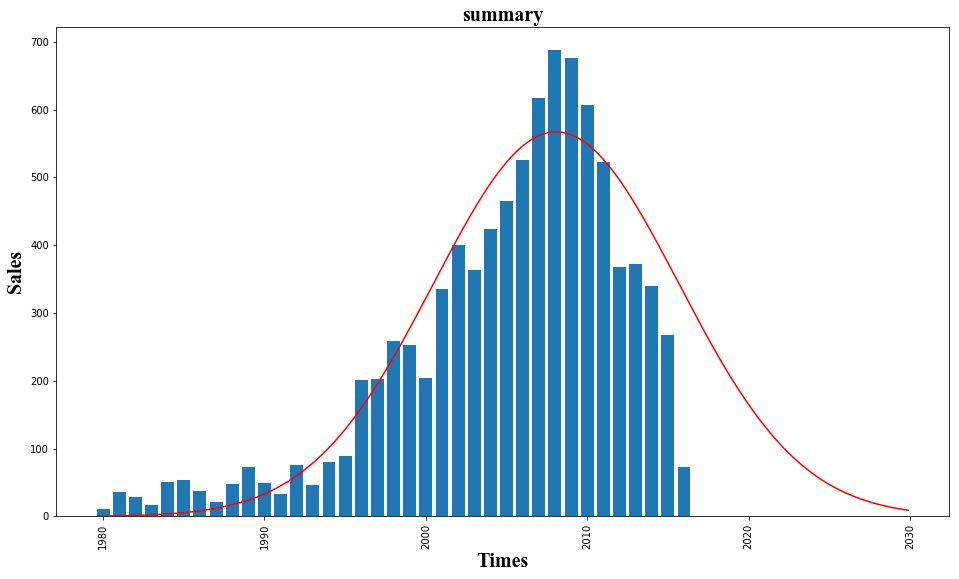

In [20]:
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

x_fit = np.arange(1980, 2030, 0.1) 
y_fit = normfun(x_fit, mu, sigma)*s
plt.figure(figsize=(16, 9))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
font = {'family':'Times New Roman', 'size':20}
plt.xlabel('Times', font)
plt.ylabel('Sales', font)
plt.title('summary', font)
plt.plot(x_fit, y_fit, 'r')
plt.show()

In [21]:
x[-2]

2017.0

In [22]:
y[-2]

0.060000000000000005

### 可以看到，按照以往的游戏销售曲线，可以推测出今后几年的游戏销售情况，但事实可能并非如此，因为原始数据应该是存在部分缺失，毕竟2017年之后的游戏销量仅有0.06，查阅一点资料就可以知道这是完全不可能的。

# 3.可视化：展示销售故事

## 3.1 索尼PS系列游戏平台的销售故事

In [29]:
PSP = data[data['Platform']=='PSP']
PSV = data[data['Platform']=='PSV']
PS = data[data['Platform']=='PS']
PS2 = data[data['Platform']=='PS2']
PS3 = data[data['Platform']=='PS3']
PS4 = data[data['Platform']=='PS4']

In [120]:
def summary(Frame_ori):
    dic = {}
    Frame = Frame_ori.dropna(subset=['Year'])
    for row in Frame.iterrows():
        dic[row[1]['Year']] = dic.get(row[1]['Year'], 0) + row[1]['Global_Sales']
    temp = sorted(dic.items(), key=lambda x:x[0])
    x = []
    y = []
    for i, _ in enumerate(temp):
        x.append(temp[i][0])
        y.append(temp[i][1])
    return x, y

In [121]:
x1, y1 = summary(PSP)
x2, y2 = summary(PSV)
x3, y3 = summary(PS)
x4, y4 = summary(PS2)
x5, y5 = summary(PS3)
x6, y6 = summary(PS4)

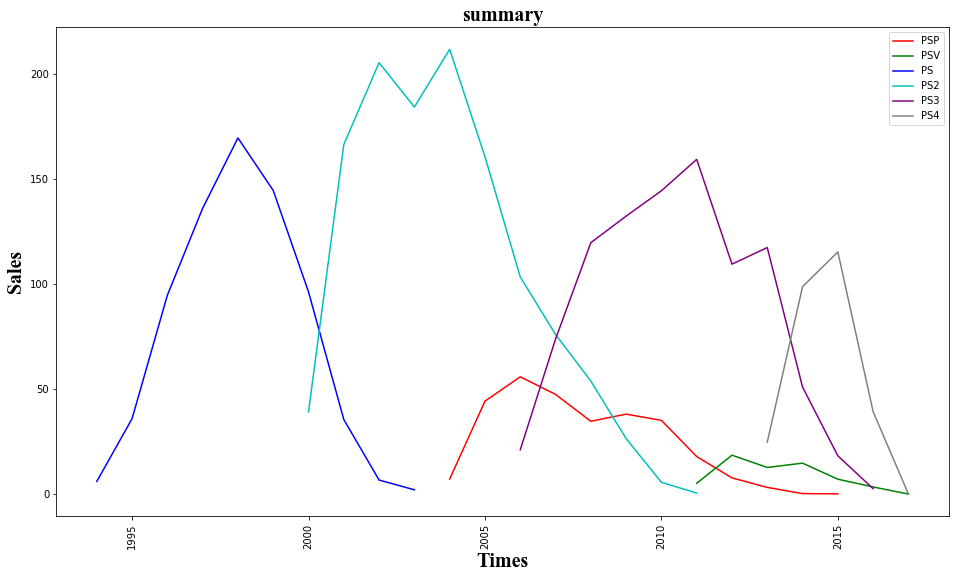

In [122]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
font = {'family':'Times New Roman', 'size':20}
plt.xlabel('Times', font)
plt.ylabel('Sales', font)
plt.title('summary', font)
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot(x4, y4, 'c')
plt.plot(x5, y5, '#800080')
plt.plot(x6, y6, '#808080')
plt.legend(['PSP', 'PSV', 'PS', 'PS2', 'PS3', 'PS4'])
plt.show()

### 可以看到索尼公司的PS系列平台游戏销量均不错，初代PS游戏在1998年达到销售峰值，然后开始进行产品更新换代，索尼每隔6、7年会推出新一款的PS游戏平台，其游戏销量在4、5年之后会达到峰值。另外，PSP和PSV算是PS的分支产品，其游戏销量相对较低

## 3.2 任天堂系列游戏平台的销售故事

In [128]:
Wii = data[data['Platform']=='Wii']
NES = data[data['Platform']=='NES']
GB = data[data['Platform']=='GB']
DS = data[data['Platform']=='DS']
SNES = data[data['Platform']=='SNES']
GBA = data[data['Platform']=='GBA']

In [129]:
x1, y1 = summary(Wii)
x2, y2 = summary(NES)
x3, y3 = summary(GB)
x4, y4 = summary(DS)
x5, y5 = summary(SNES)
x6, y6 = summary(GBA)

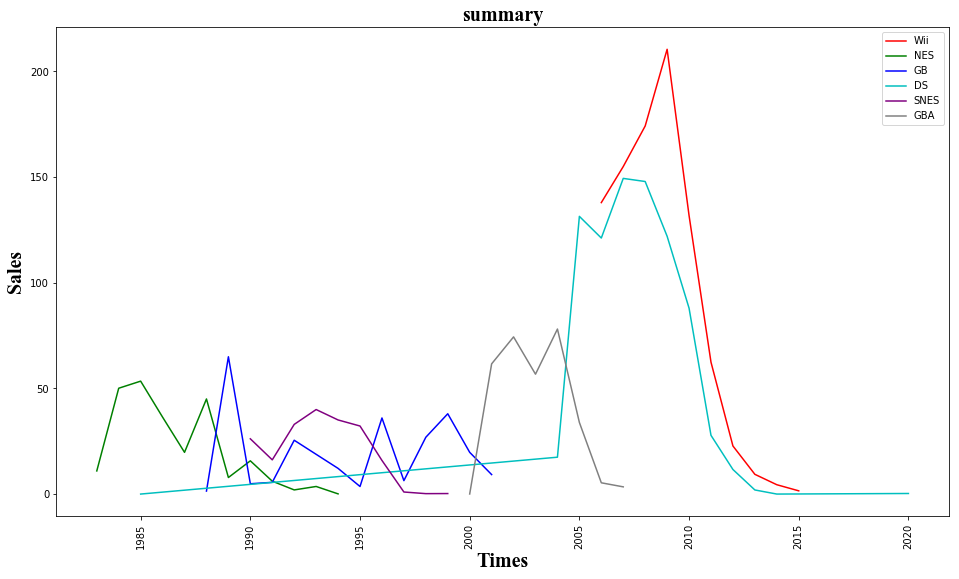

In [130]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
font = {'family':'Times New Roman', 'size':20}
plt.xlabel('Times', font)
plt.ylabel('Sales', font)
plt.title('summary', font)
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot(x4, y4, 'c')
plt.plot(x5, y5, '#800080')
plt.plot(x6, y6, '#808080')
plt.legend(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA'])
plt.show()

### 可以看到，任天堂游戏机平台下的游戏跟索尼不一样，呈现出多点开花的局面，同一时间段有多种类型的游戏机平台在市面上受到欢迎。同时，其DS游戏平台游戏和Wii游戏平台游戏在2005-2010时间段发售量极大，通过分析不难发现，这得益于这段时间任天堂推出了部分大作，比如Wii Sports、马里奥、宝可梦等，极大促进了游戏的发售